In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "puglia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,16,Puglia,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,16,Puglia,1,0,1,2,3,2,2,...,0.0,242.0,0.0,2.0,0.00,33.33,0.83,0.00,0.00,200.00
4,2020-02-29T17:00:00,16,Puglia,1,0,1,2,3,0,0,...,0.0,10.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,2020-12-03T17:00:00,16,Puglia,1621,226,1847,39902,41749,989,1602,...,42.0,8753.0,2925.0,1031.0,12.24,4.42,18.30,54.77,10.78,2.43
283,2020-12-04T17:00:00,16,Puglia,1596,227,1823,40721,42544,795,1419,...,72.0,9480.0,6629.0,819.0,12.45,4.28,14.97,21.41,0.44,1.90
284,2020-12-05T17:00:00,16,Puglia,1576,220,1796,42364,44160,1616,1884,...,28.0,10119.0,3988.0,1643.0,12.25,4.07,18.62,47.24,-3.08,3.80
285,2020-12-06T17:00:00,16,Puglia,1613,203,1816,44018,45834,1674,1789,...,24.0,7293.0,1915.0,1654.0,11.18,3.96,24.53,93.42,-7.73,3.79


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1001
Nuovi tamponi: 3821.0
Percentuale nuovi positivi/nuovi tamponi: 26.200000000000003 %
Nuovi guariti: 233.0
Nuovi deceduti: 24.0
Variazione positivi ricoverati con sintomi: -5.0
Variazione positivi in terapia intensiva: -6.0
Variazione positivi in isolamento dimiciliare: 755.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 7, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-08T17:00:00,16,Puglia,278,23,301,3033,3334,201,248,...,1.0,4754.0,3083.0,174.0,7.64,9.03,5.22,8.04,0.00,6.42
1,2020-10-09T17:00:00,16,Puglia,300,23,323,3227,3550,216,249,...,2.0,4596.0,3494.0,194.0,7.12,9.10,5.42,7.13,0.00,6.48
2,2020-10-10T17:00:00,16,Puglia,300,22,322,3389,3711,161,184,...,1.0,5189.0,3452.0,162.0,6.83,8.68,3.55,5.33,-4.35,4.54
3,2020-10-11T17:00:00,16,Puglia,301,21,322,3485,3807,96,212,...,1.0,3887.0,1867.0,96.0,6.52,8.46,5.45,11.36,-4.55,2.59
4,2020-10-12T17:00:00,16,Puglia,307,19,326,3587,3913,106,157,...,6.0,2433.0,1928.0,102.0,5.83,8.33,6.45,8.14,-9.52,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-03T17:00:00,16,Puglia,1621,226,1847,39902,41749,989,1602,...,42.0,8753.0,2925.0,1031.0,12.24,4.42,18.30,54.77,10.78,2.43
57,2020-12-04T17:00:00,16,Puglia,1596,227,1823,40721,42544,795,1419,...,72.0,9480.0,6629.0,819.0,12.45,4.28,14.97,21.41,0.44,1.90
58,2020-12-05T17:00:00,16,Puglia,1576,220,1796,42364,44160,1616,1884,...,28.0,10119.0,3988.0,1643.0,12.25,4.07,18.62,47.24,-3.08,3.80
59,2020-12-06T17:00:00,16,Puglia,1613,203,1816,44018,45834,1674,1789,...,24.0,7293.0,1915.0,1654.0,11.18,3.96,24.53,93.42,-7.73,3.79


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

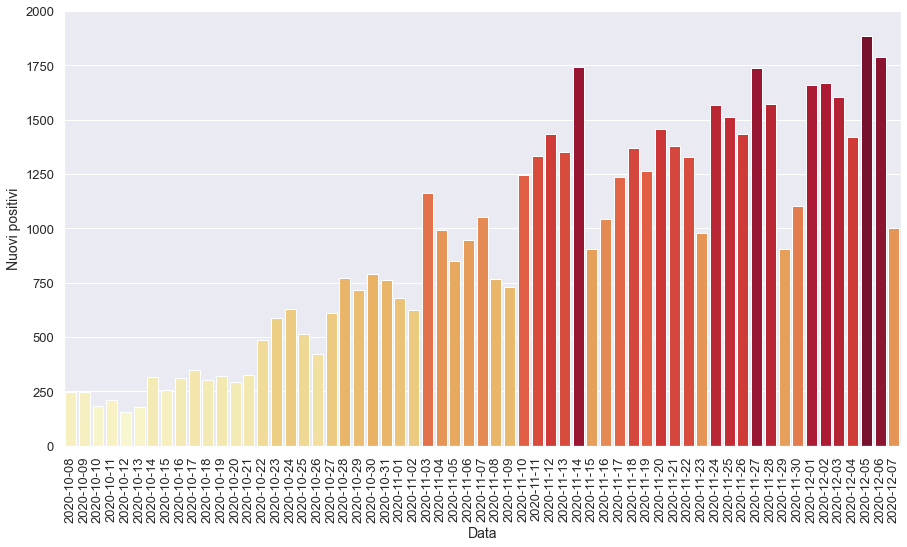

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

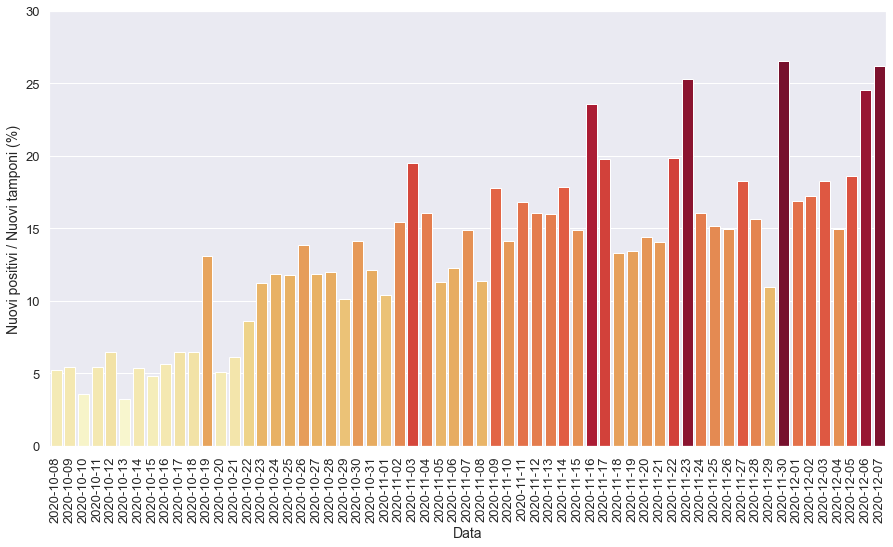

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

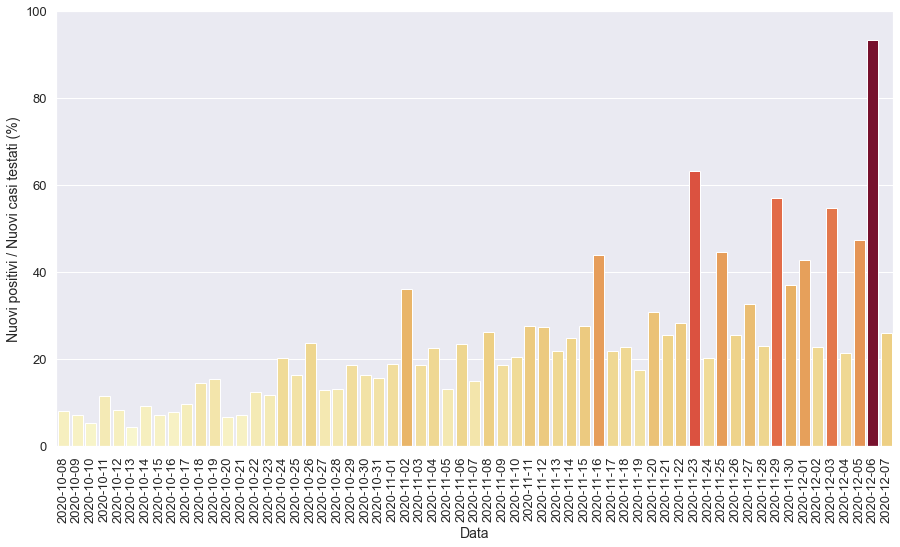

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

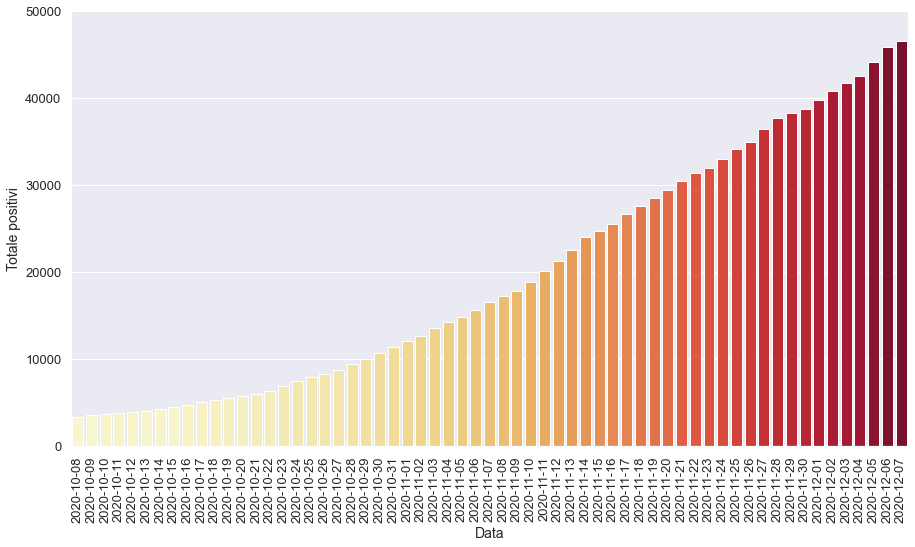

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

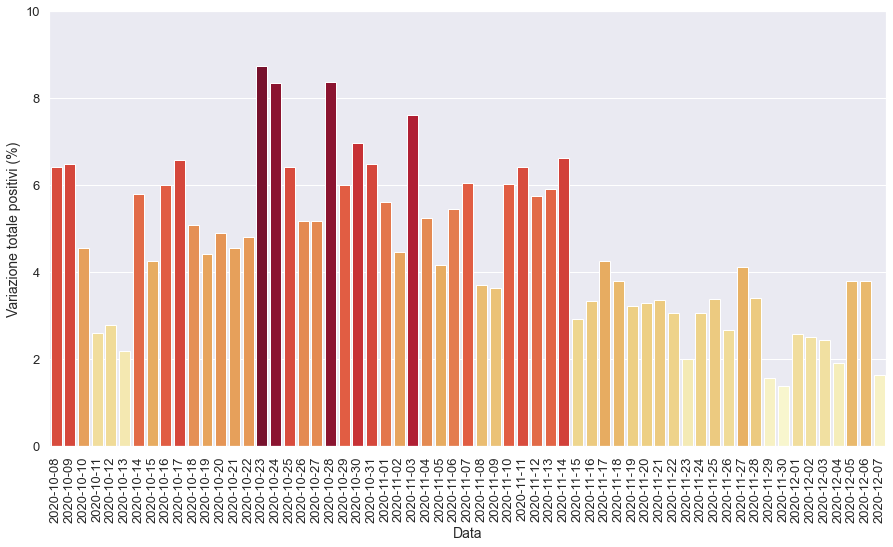

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

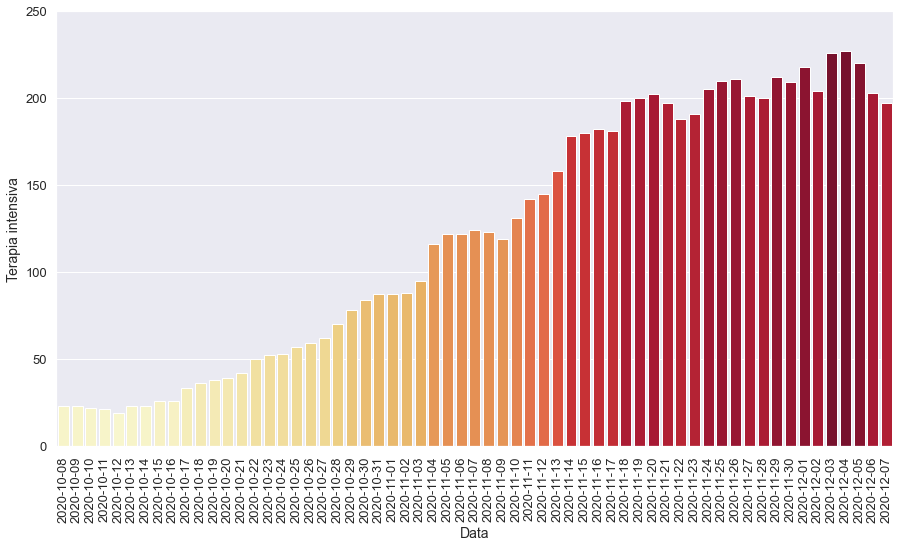

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

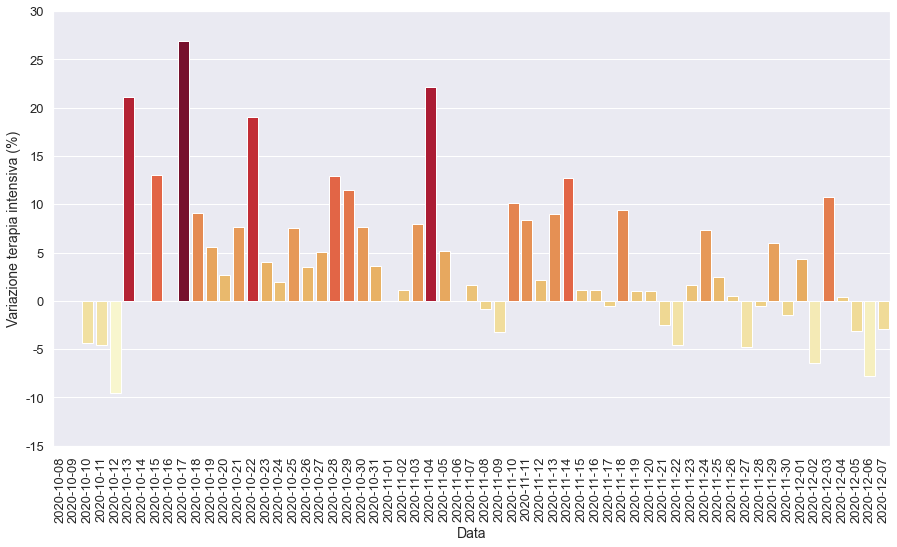

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

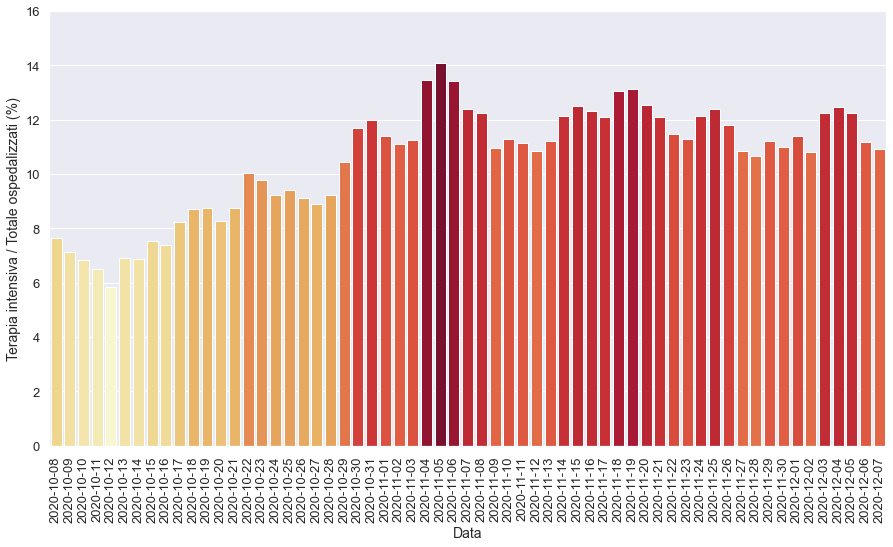

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

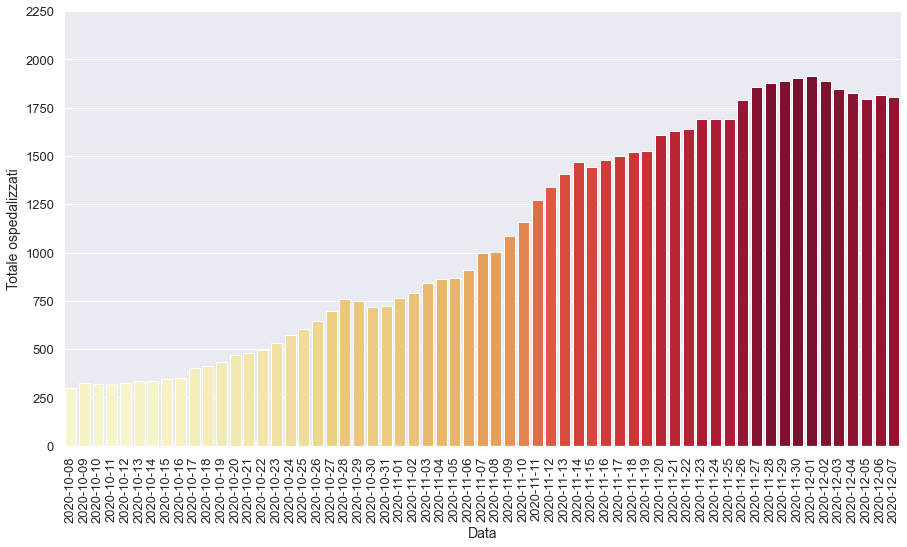

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

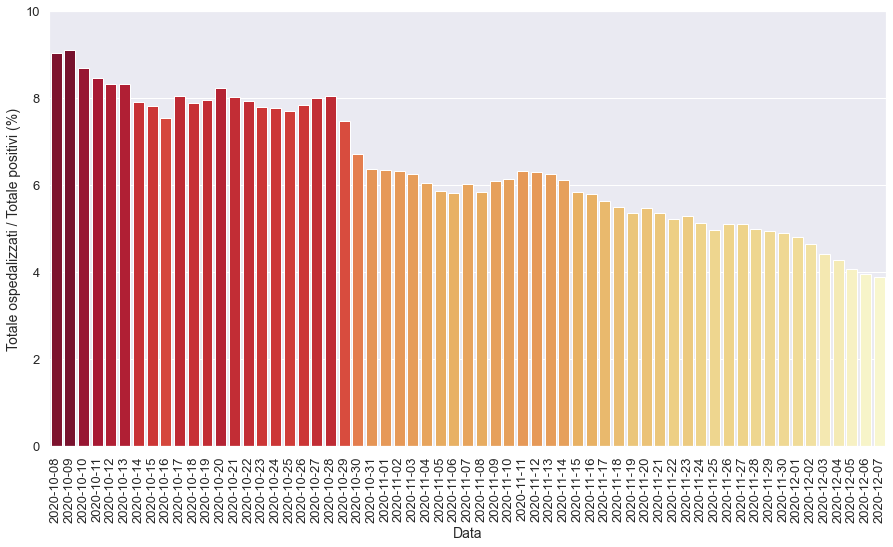

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

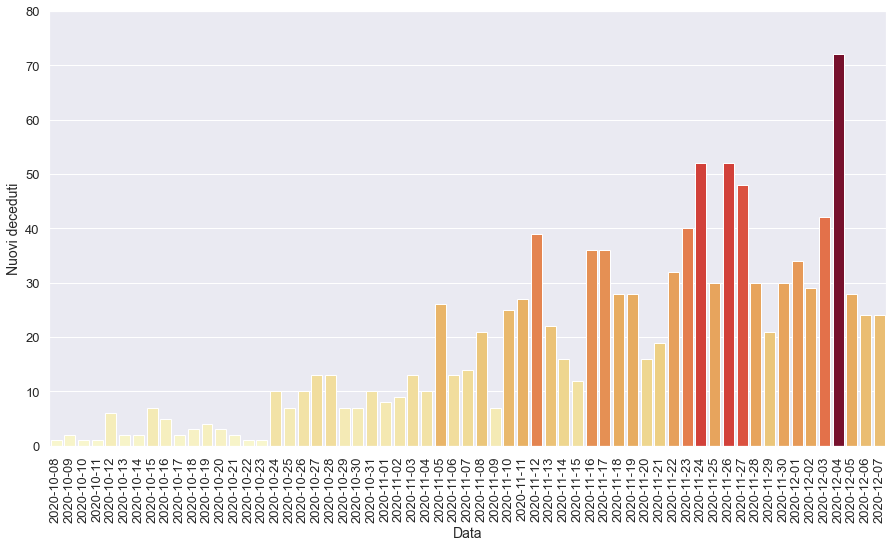

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

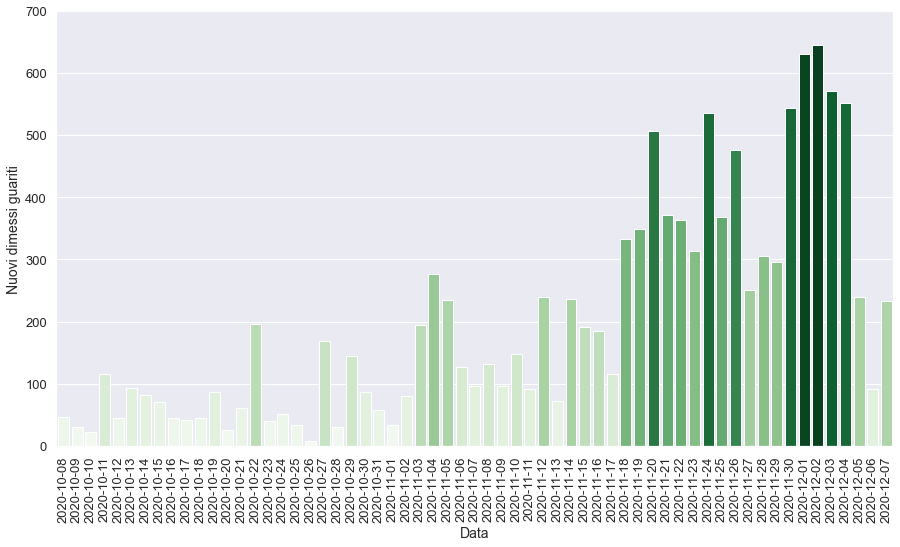

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-07T17:00:00,16,Puglia,876,124,1000,15573,16573,944,1054,...,14.0,7081.0,7063.0,853.0,12.40,6.03,14.88,14.92,1.64,6.04
1,2020-11-08T17:00:00,16,Puglia,880,123,1003,16184,17187,614,766,...,21.0,6723.0,2937.0,611.0,12.26,5.84,11.39,26.08,-0.81,3.70
2,2020-11-09T17:00:00,16,Puglia,968,119,1087,16726,17813,626,730,...,7.0,4103.0,3929.0,542.0,10.95,6.10,17.79,18.58,-3.25,3.64
3,2020-11-10T17:00:00,16,Puglia,1029,131,1160,17726,18886,1073,1245,...,25.0,8825.0,6085.0,1000.0,11.29,6.14,14.11,20.46,10.08,6.02
4,2020-11-11T17:00:00,16,Puglia,1131,142,1273,18826,20099,1213,1332,...,27.0,7913.0,4836.0,1100.0,11.15,6.33,16.83,27.54,8.40,6.42
5,2020-11-12T17:00:00,16,Puglia,1193,145,1338,19917,21255,1156,1434,...,39.0,8936.0,5248.0,1091.0,10.84,6.29,16.05,27.32,2.11,5.75
6,2020-11-13T17:00:00,16,Puglia,1249,158,1407,21104,22511,1256,1350,...,22.0,8461.0,6223.0,1187.0,11.23,6.25,15.96,21.69,8.97,5.91
7,2020-11-14T17:00:00,16,Puglia,1289,178,1467,22533,24000,1489,1741,...,16.0,9745.0,7020.0,1429.0,12.13,6.11,17.87,24.80,12.66,6.61
8,2020-11-15T17:00:00,16,Puglia,1261,180,1441,23261,24702,702,905,...,12.0,6070.0,3292.0,728.0,12.49,5.83,14.91,27.49,1.12,2.92
9,2020-11-16T17:00:00,16,Puglia,1295,182,1477,24048,25525,823,1044,...,36.0,4425.0,2381.0,787.0,12.32,5.79,23.59,43.85,1.11,3.33


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

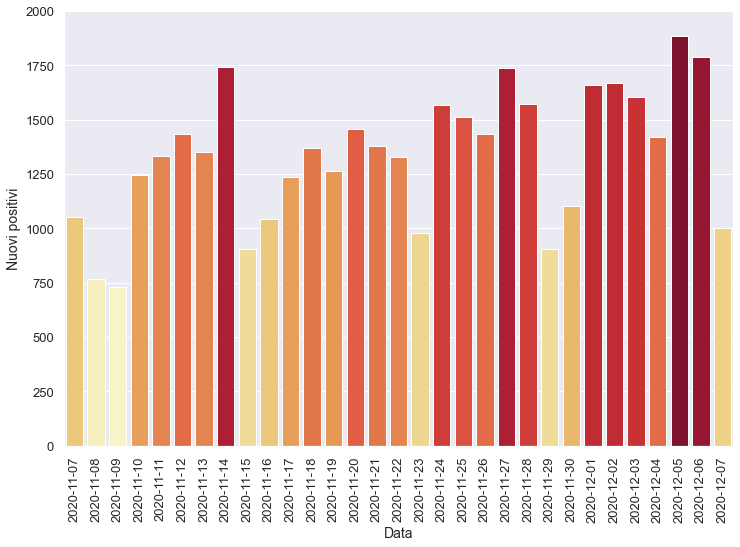

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

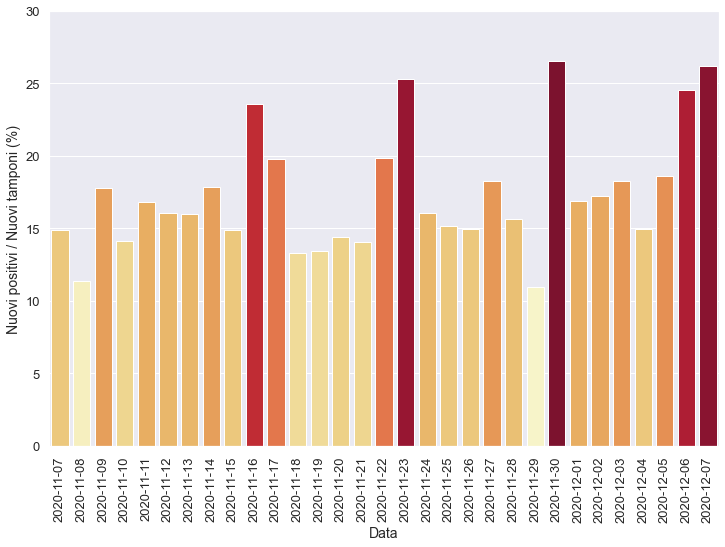

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

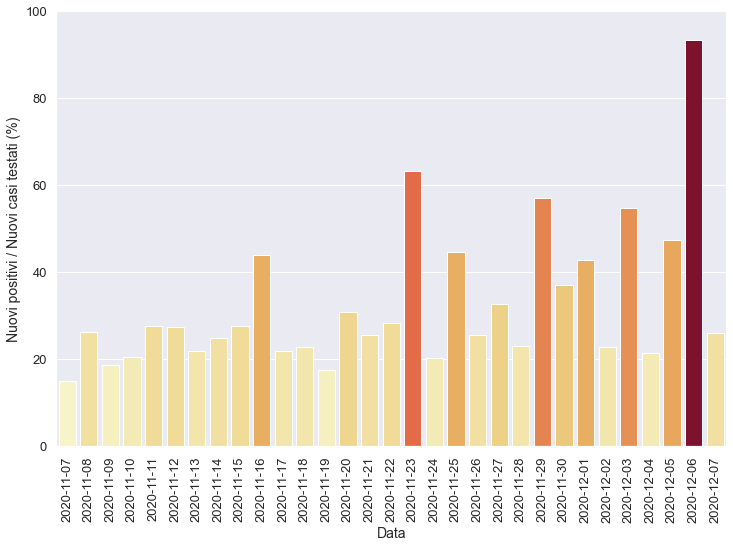

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

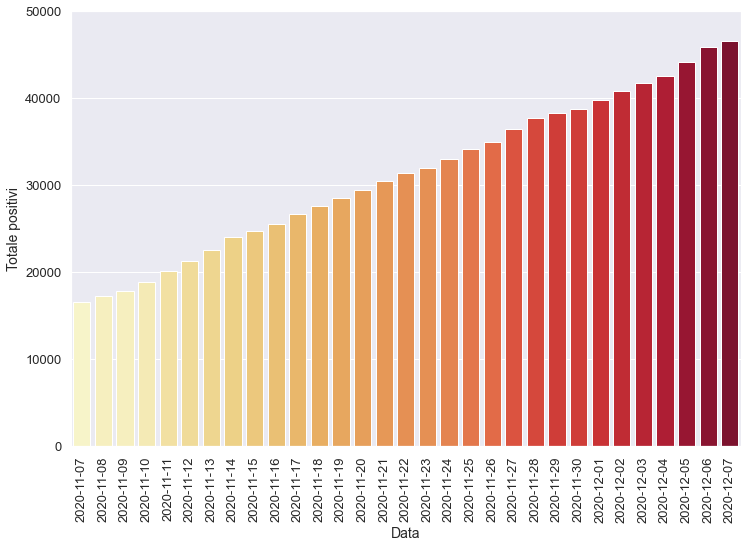

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

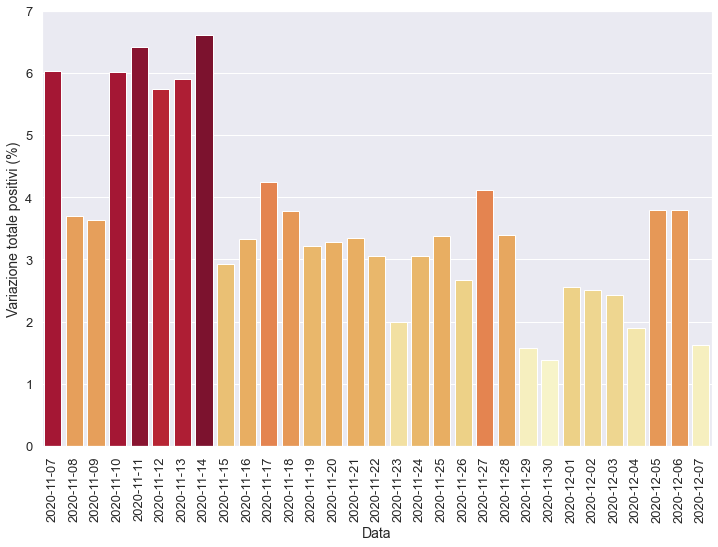

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

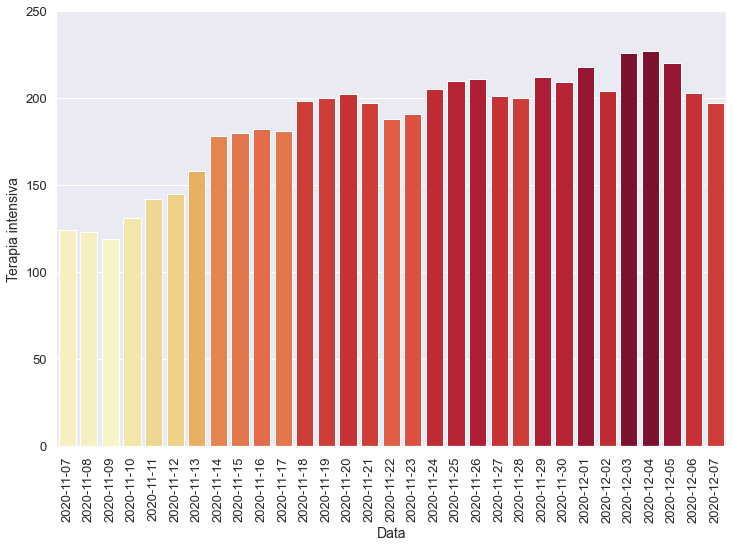

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

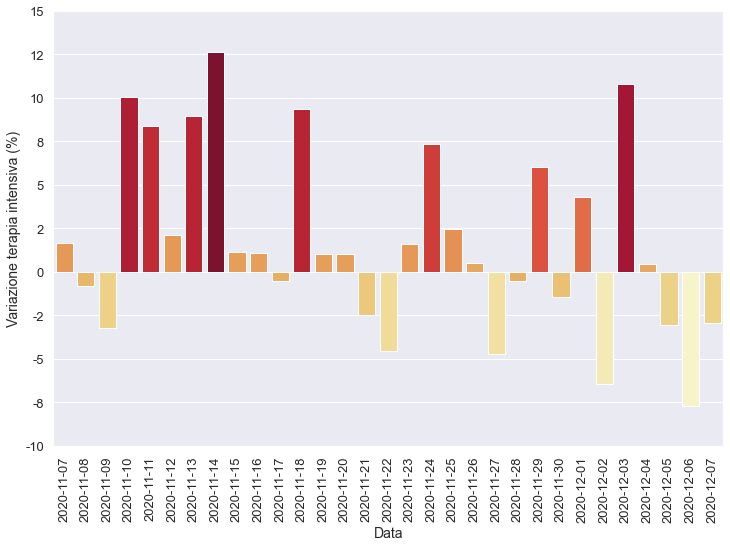

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

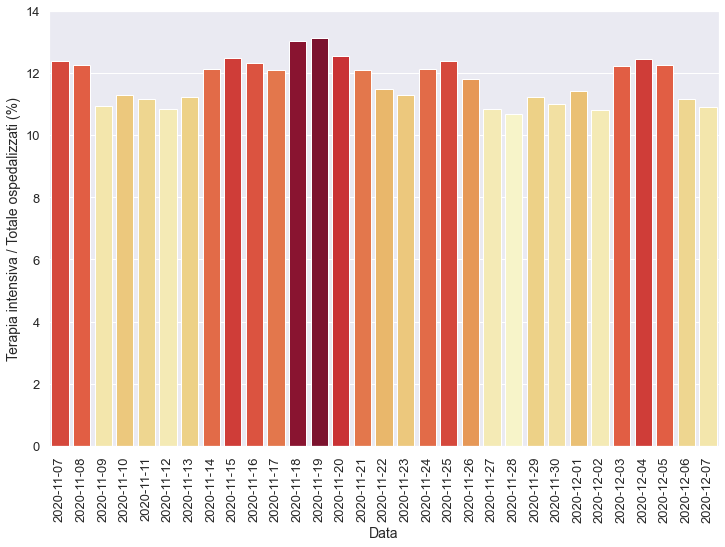

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

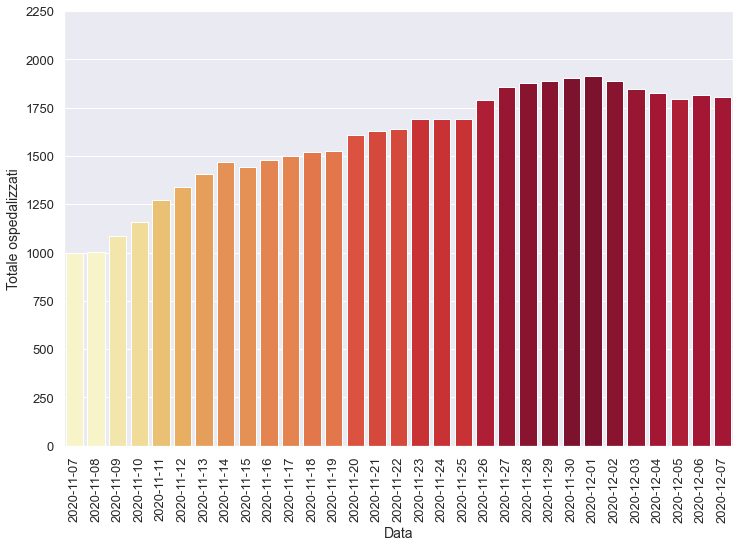

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

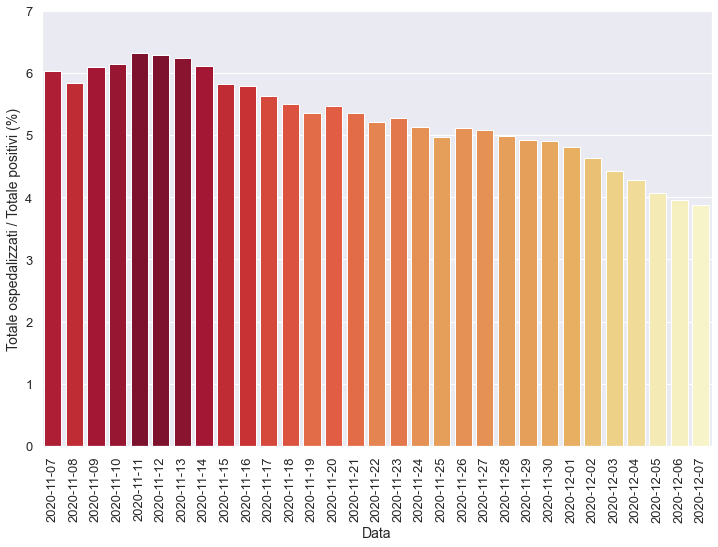

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

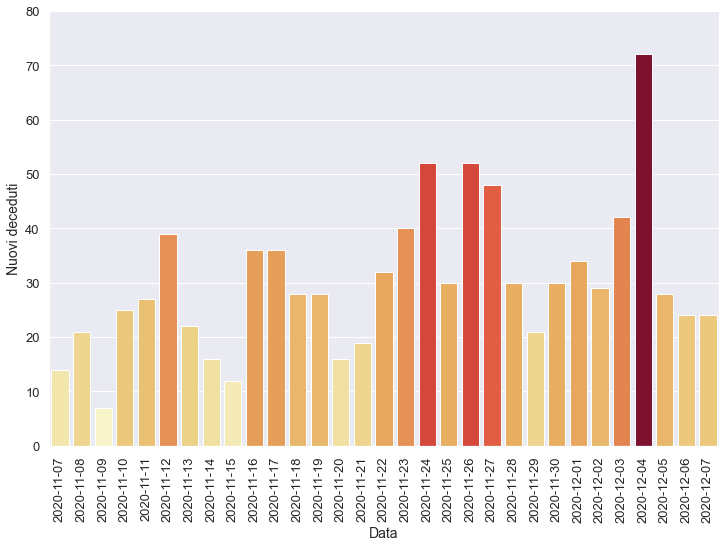

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

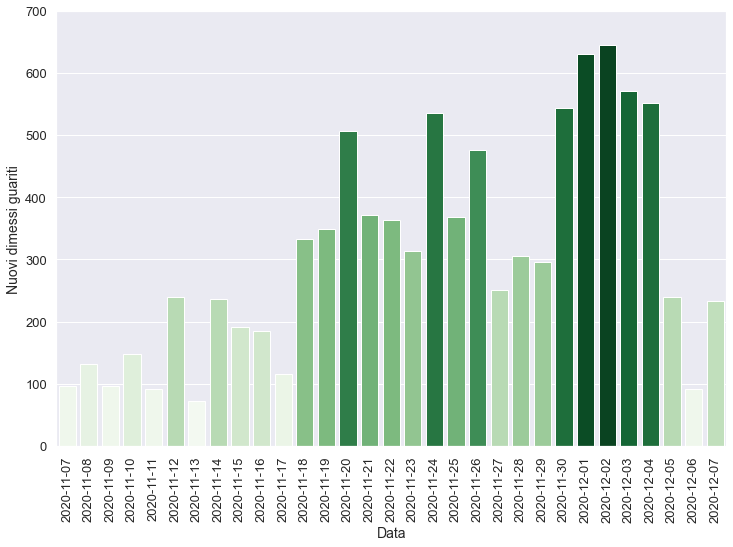

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-30T17:00:00,16,Puglia,1692,209,1901,36871,38772,528,1102,...,30.0,4151.0,2979.0,514.0,10.99,4.90,26.55,36.99,-1.42,1.38
1,2020-12-01T17:00:00,16,Puglia,1693,218,1911,37855,39766,994,1659,...,34.0,9820.0,3892.0,984.0,11.41,4.81,16.89,42.63,4.31,2.56
2,2020-12-02T17:00:00,16,Puglia,1685,204,1889,38871,40760,994,1668,...,29.0,9693.0,7334.0,1016.0,10.80,4.63,17.21,22.74,-6.42,2.50
3,2020-12-03T17:00:00,16,Puglia,1621,226,1847,39902,41749,989,1602,...,42.0,8753.0,2925.0,1031.0,12.24,4.42,18.30,54.77,10.78,2.43
4,2020-12-04T17:00:00,16,Puglia,1596,227,1823,40721,42544,795,1419,...,72.0,9480.0,6629.0,819.0,12.45,4.28,14.97,21.41,0.44,1.90
5,2020-12-05T17:00:00,16,Puglia,1576,220,1796,42364,44160,1616,1884,...,28.0,10119.0,3988.0,1643.0,12.25,4.07,18.62,47.24,-3.08,3.80
6,2020-12-06T17:00:00,16,Puglia,1613,203,1816,44018,45834,1674,1789,...,24.0,7293.0,1915.0,1654.0,11.18,3.96,24.53,93.42,-7.73,3.79
7,2020-12-07T17:00:00,16,Puglia,1608,197,1805,44773,46578,744,1001,...,24.0,3821.0,3846.0,755.0,10.91,3.88,26.20,26.03,-2.96,1.62


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

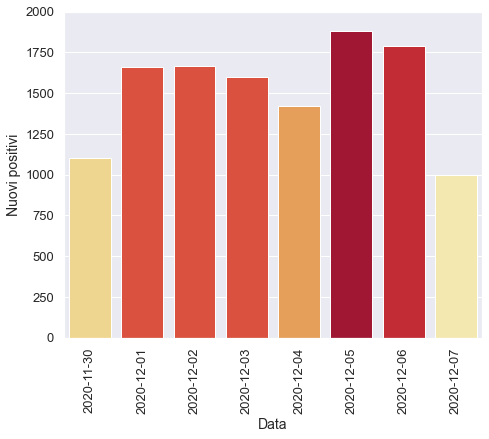

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

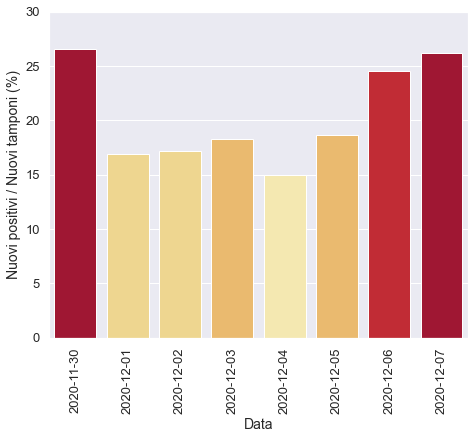

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

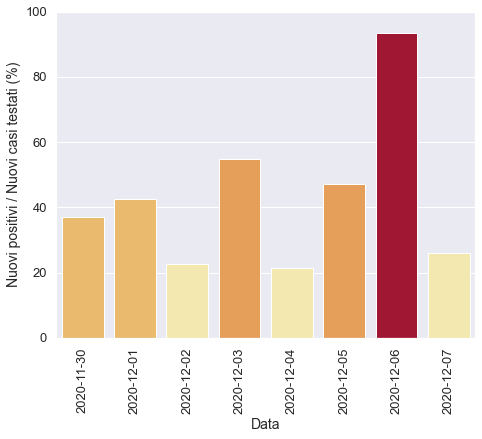

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

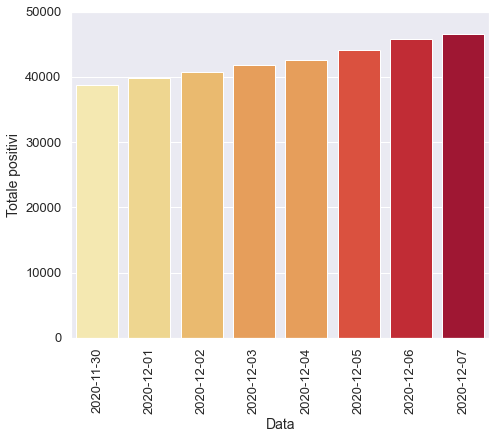

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

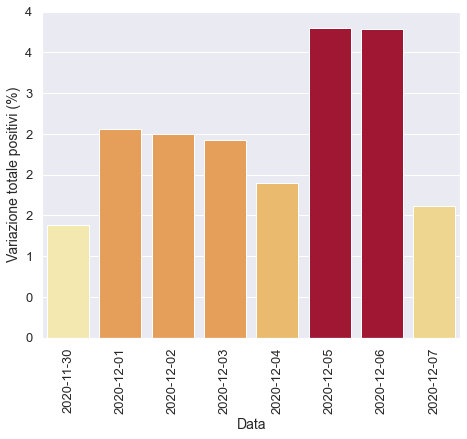

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

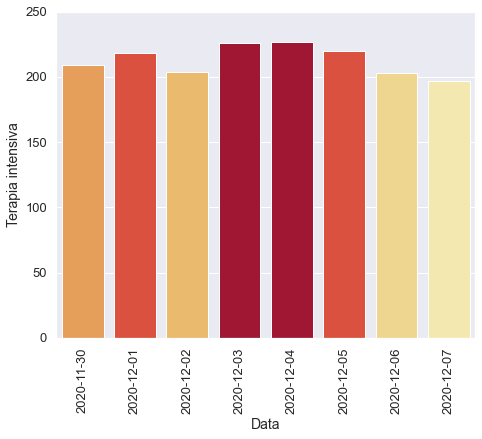

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

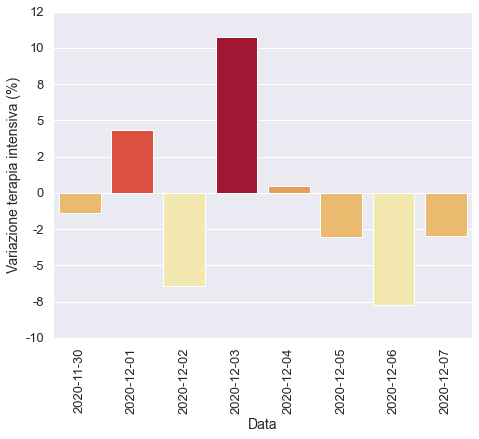

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

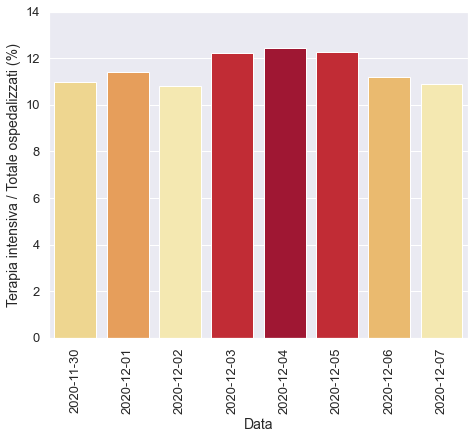

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

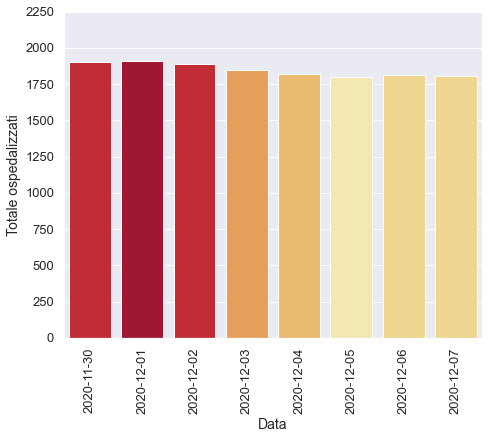

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

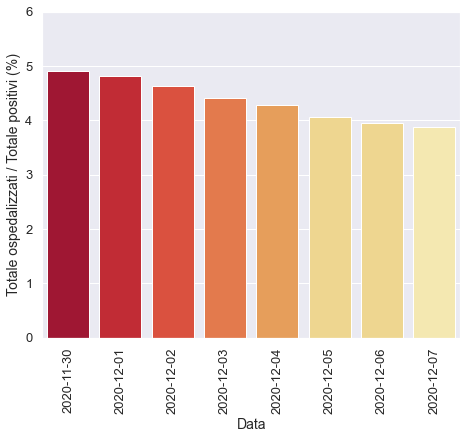

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

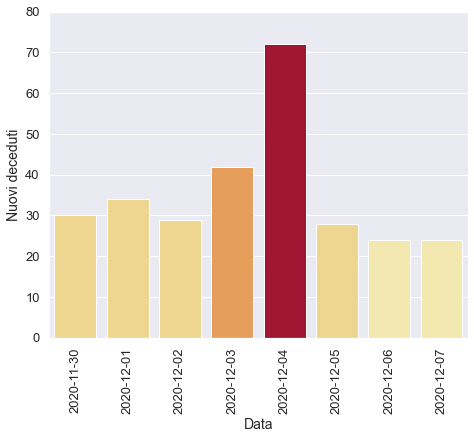

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

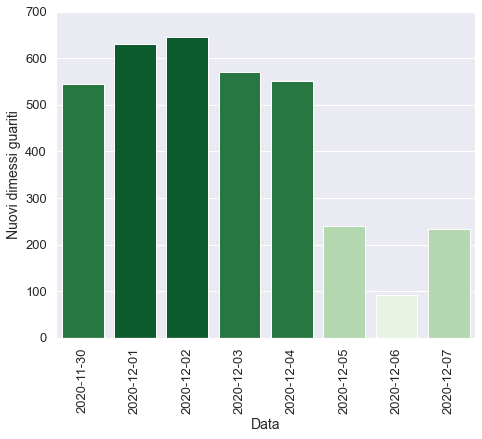

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)